In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import preprocessing as pre
from mlp import MLP
from loss import CCE
from utils import accuracy, visualize_training

### Preprocessing & Setup

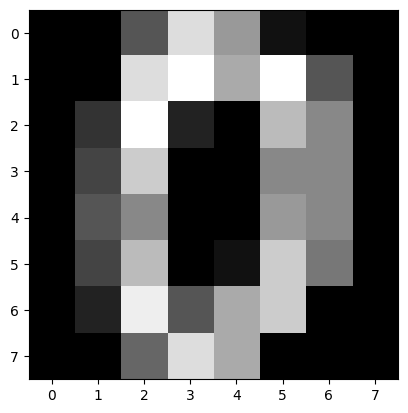

In [59]:
digits = load_digits()
data = (digits.data.astype("float32"), digits.target)

# constants
BATCH_SIZE = 32
NUM_EPOCHS = 2000
LEARNING_RATE = 0.03

plt.imshow(data[0][0].reshape(8,8), cmap="gray")

In [52]:
#preprocessing
x = pre.normalize(data[0][:1500], 0, 1)
y = pre.encode_targets(data[1][:1500])

#validation set for performance measure
x_val = data[0][1500:]
y_val = data[1][1500:]

#create model
model = MLP(64, [16,12,10])
cce = CCE()

Layer(num_units=16, input_size=64, activation=Sigmoid)
Layer(num_units=12, input_size=16, activation=Sigmoid)
Layer(num_units=10, input_size=12, activation=Softmax)


### Training

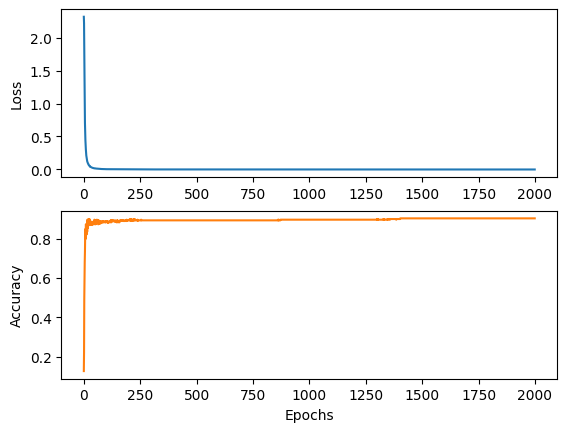

In [54]:
avg_loss = []
accuracies = []
#generate shuffled batches
for i in range(NUM_EPOCHS):
    losses = []
    shuffled = pre.batch_generator(x, y, BATCH_SIZE)
    for data_batch, target_batch in shuffled:
        out = model.forward(data_batch)
        loss = cce(out, target_batch)
        grad = cce.backwards(out, target_batch)
        model.backwards(grad)
        model.update(LEARNING_RATE)
        losses.append(np.mean((loss), axis = 0))
    accuracies.append(accuracy(model, x_val, y_val))
    avg_loss.append(np.mean(losses))

visualize_training(avg_loss, accuracies)

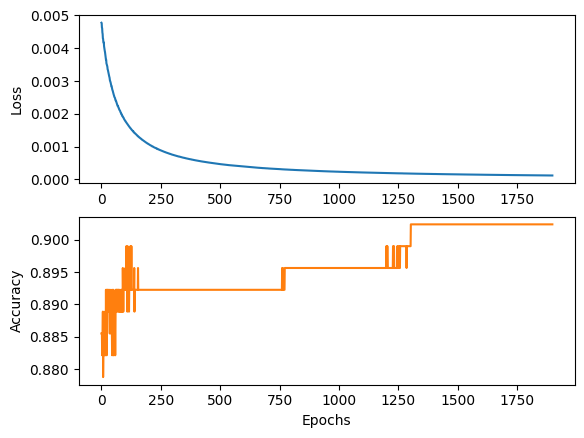

In [55]:
visualize_training(avg_loss[100:], accuracies[100:])

### Results
- 100% accuracy if we test on training data even with 1 layer architecture and low number of epochs
- 90+% accuracy if we test on validation data with more complex architecture -> one more layer, more neurons per layer